In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "opencv_helper")))
from opencv_helper import helper

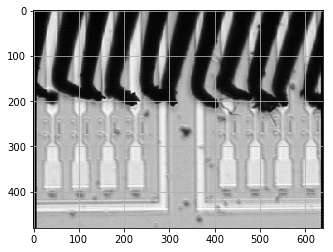

In [2]:
img_name = 'inputs/1.png'
origin = cv2.imread(img_name)
img = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.grid()
plt.show()

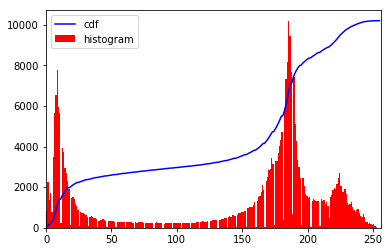

In [3]:
helper.histogram(img)

True

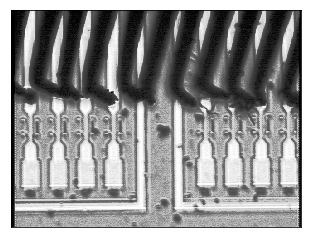

In [3]:
equ = cv2.equalizeHist(img)
helper.show_img(equ)
template = equ[280:400, 200:260]
cv2.imwrite('pad_template.png', template)

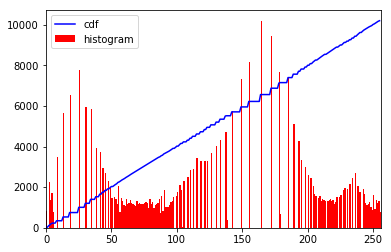

In [6]:
helper.histogram(equ)

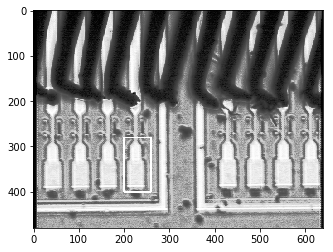

In [8]:
helper.match_template(equ, template, method=cv2.TM_CCOEFF_NORMED)

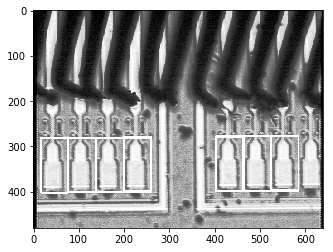

In [7]:
helper.match_more(equ, template, method=cv2.TM_CCOEFF_NORMED, threshold=0.90)

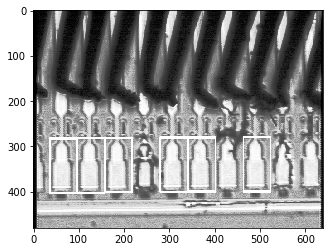

In [4]:
origin2 = cv2.imread('inputs/5.png')
img2 = cv2.cvtColor(origin2, cv2.COLOR_BGR2GRAY)
helper.match_more(cv2.equalizeHist(img2), template, method=cv2.TM_CCOEFF_NORMED, threshold=0.90)

4.35484e+07
20234


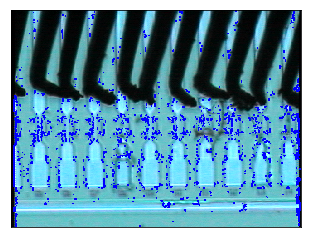

In [8]:
equ2 = cv2.equalizeHist(img2)
gray = np.float32(equ2)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
th = 0.01
print(dst.max())
print(np.count_nonzero(dst > th*dst.max()))
origin2_cp = origin2.copy()
origin2_cp[dst > th*dst.max()]=[0,0,255]
helper.show_img(origin2_cp)

(480, 640, 3)


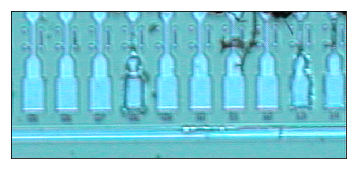

In [28]:
print(origin2.shape)
roi = origin2[210:, 22:634, :]
helper.show_img(roi)

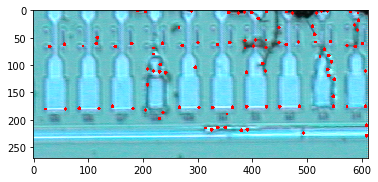

(<matplotlib.image.AxesImage at 0x112b32f28>, None)

In [29]:
roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(roi_gray, 100, 0.01, 10)
corners = np.int0(corners)
roi_cp = roi.copy()

for i in corners:
    x,y = i.ravel()
    cv2.circle(roi_cp,(x,y), 3, 255, -1)

plt.imshow(roi_cp), plt.show()